In [69]:
#plot figure 5

In [70]:
import pandas as pd
import scipy.stats as ss
from statannotations.Annotator import Annotator
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pybedtools import BedTool

In [71]:
commonFontsize=8

def config_rcparams():    
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial' 
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3

config_rcparams()


In [72]:
#tads contact matrix table, with HPV18, hela
tad_cm_table=pd.read_csv('./datasets/chr8_tad_interaction_HPV18.tsv', sep='\t')
tad_cm_table

,chrom,start,end,name,no_reads,reads_kb
0,chr8,2190001,2330000,TAD3034,0.000000,0.000000
1,chr8,5780001,5970000,TAD3035,0.000000,0.000000
2,chr8,6350001,6660000,TAD3036,3.132994,0.010106
3,chr8,8090001,8540000,TAD3037,5.009687,0.011133
4,chr8,8600001,8870000,TAD3038,4.963382,0.018383
5,chr8,9890001,10140000,TAD3039,2.588084,0.010352
6,chr8,10440001,10700000,TAD3040,7.077676,0.027222
7,chr8,10750001,11140000,TAD3041,4.211667,0.010799
8,chr8,11260001,11810000,TAD3042,9.356419,0.017012
9,chr8,12500001,12710000,TAD3043,4.640872,0.022099


In [73]:
tad_cm_table['name'].nunique()

174

In [74]:
tad_cm_table['reads_kb'].describe()

count    174.000000
mean       0.058928
std        0.469489
min        0.000000
25%        0.004845
50%        0.010866
75%        0.022671
max        6.169856
Name: reads_kb, dtype: float64

In [75]:
tad_cm_table[tad_cm_table['name']=='TAD3189']

,chrom,start,end,name,no_reads,reads_kb
155,chr8,128230001,128980000,TAD3189,4627.386168,6.169856


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

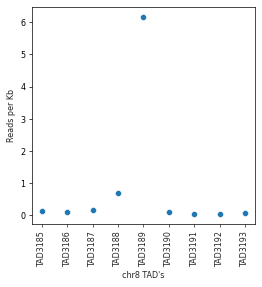

In [76]:
# Plotting only for the TAD3189 and 4 tads +/-
plt.figure(figsize=(4,4))
sns.scatterplot(x='name', y='reads_kb', data=tad_cm_table[tad_cm_table['name'].isin(\
        ['TAD3185', 'TAD3186', 'TAD3187', 'TAD3188', 'TAD3189', 'TAD3190', 'TAD3191', 'TAD3192', 'TAD3193'])])
plt.xlabel("chr8 TAD's")
plt.ylabel('Reads per Kb')
plt.xticks(rotation=90)


In [77]:
##

In [78]:
#MYC and PVT1 promoter interaction table with chr8 and HPV18, hela
pro_table=pd.read_csv('./datasets/pro_interaction_table.tsv', sep='\t')
pro_table

,counts,chr,pro,log2_reads
0,5.025481,chr8,bin_12875,2.329262
1,5.852425,chr8,bin_12875,2.549035
2,16.051299,chr8,bin_12875,4.004618
3,9.442443,chr8,bin_12875,3.239160
4,12.623053,chr8,bin_12875,3.657989
5,10.351289,chr8,bin_12875,3.371739
6,11.760718,chr8,bin_12875,3.555904
7,14.329243,chr8,bin_12875,3.840891
8,8.582752,chr8,bin_12875,3.101440
9,7.165924,chr8,bin_12875,2.841153


In [79]:
pro_table['chr'].value_counts()

chr8     394
HPV18      2
Name: chr, dtype: int64

In [80]:
pro_table['pro'].value_counts()

bin_12875    218
bin_12881    178
Name: pro, dtype: int64

In [81]:
for item in pro_table['pro'].unique():
    print(item)
    print(pro_table[pro_table['pro']==item]['log2_reads'].describe())

bin_12875
count    218.000000
mean       4.254046
std        1.301715
min        2.328990
25%        3.128163
50%        4.124533
75%        5.372912
max        8.416424
Name: log2_reads, dtype: float64
bin_12881
count    178.000000
mean       4.001909
std        1.360141
min        2.321941
25%        3.049039
50%        3.700700
75%        4.286299
max        8.793969
Name: log2_reads, dtype: float64


In [82]:
pro_table[pro_table['chr']=='HPV18']

,counts,chr,pro,log2_reads
217,96.346972,HPV18,bin_12875,6.590167
395,41.769147,HPV18,bin_12881,5.384366


[Text(0.5, 0, 'Interaction frequency, log2')]

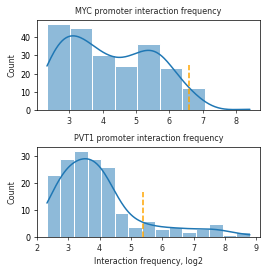

In [83]:
#plotting distribution of interaction frequency, only those bins supported by more than 5 reads
fig, ax=plt.subplots(2, 1, figsize=(4, 4), gridspec_kw={'hspace':0.40})
             
sns.histplot(data=pro_table[pro_table['pro']=='bin_12875'], x='log2_reads', kde=True, ax=ax[0])
ax[0].axvline(6.59, 0, 0.5, ls='--', color='orange')
ax[0].set_title('MYC promoter interaction frequency')
ax[0].set(xlabel=None)

sns.histplot(data=pro_table[pro_table['pro']=='bin_12881'], x='log2_reads', kde=True, ax=ax[1])
ax[1].axvline(5.38, 0, 0.5, ls='--', color='orange')
ax[1].set_title('PVT1 promoter interaction frequency')
ax[1].set(xlabel='Interaction frequency, log2')


In [84]:
##

In [85]:
#HPV18 interactions with TAD3189 and distance matched controls
df = pd.read_csv('./datasets/TAD3189_vs_distanceMatched_interactions.txt', sep='\t')
df.head()

,values,distance,colorz,side2
0,306.923168,10000.0,gray44,chr8-chr8
1,380.397108,10000.0,gray44,chr8-chr8
2,459.542496,10000.0,gray44,chr8-chr8
3,354.443940,10000.0,gray44,chr8-chr8
4,354.303497,10000.0,gray44,chr8-chr8


In [86]:
df['side2'].value_counts()

chr8-chr8               74000
HPV18-chr8-withinTAD       74
HPV18-chr8-outside         74
Name: side2, dtype: int64

Text(0.5, 0, '')

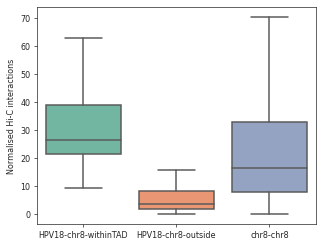

In [87]:
#plot
sns.set_style(style='ticks')
plt.figure(figsize=(5,4))


sns.boxplot(x='side2', y='values', data=df, showfliers = False, 
            order=['HPV18-chr8-withinTAD', 'HPV18-chr8-outside', 'chr8-chr8'], palette=['#66c2a5', '#fc8d62', 
                                                                                     '#8da0cb'])


plt.ylabel('Normalised Hi-C interactions')
plt.xlabel('')


In [88]:
ss.mannwhitneyu(df[df['side2']=='HPV18-chr8-withinTAD']['values'],\
                df[df['side2']=='HPV18-chr8-outside']['values'], alternative='two-sided')

MannwhitneyuResult(statistic=5237.0, pvalue=9.54002720127635e-22)

In [89]:
ss.mannwhitneyu(df[df['side2']=='HPV18-chr8-withinTAD']['values'],\
                df[df['side2']=='chr8-chr8']['values'], alternative='two-sided')

MannwhitneyuResult(statistic=3781520.0, pvalue=1.3792009830046098e-08)

In [90]:
#########